**ANN - mang noi tiep mang**

In [44]:
import numpy as np

In [45]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [46]:
(train_images, train_labels),(test_images,test_labels) = mnist.load_data()

In [47]:
train_images.shape

(60000, 28, 28)

In [48]:
train_labels.shape

(60000,)

In [49]:
test_images.shape

(10000, 28, 28)

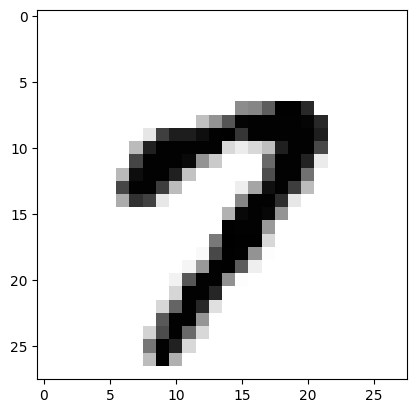

In [50]:
digit = train_images[15]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [51]:
print('So : ',train_labels[15])

So :  7


<ipython-input-52-bf927780fdd9>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1)


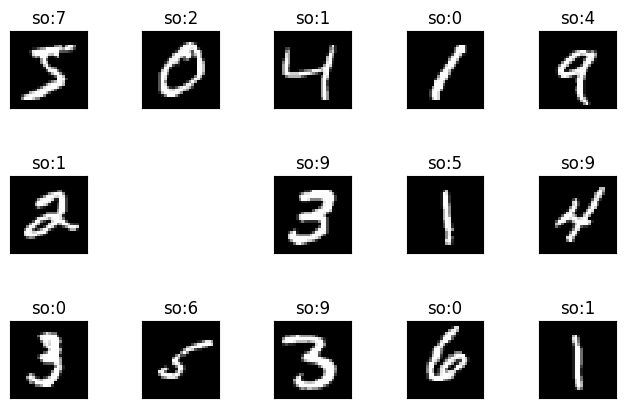

In [52]:
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap='gray',interpolation='none')
  plt.title('so:{}'.format(test_labels[i]))
  plt.xticks([])
  plt.yticks([])


**vẽ mạng**

In [53]:
from keras.models import Sequential 
from keras.layers import Dense 
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(28*28,)))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [54]:
X = test_images
y = test_labels

In [55]:
train_images = train_images.reshape(60000,28*28)
train_images = train_images.astype('float32')/255
test_images = test_images.reshape(10000,28*28)
test_images = test_images.astype('float32')/255

In [56]:
train_images.shape

(60000, 784)

In [57]:
test_images.shape

(10000, 784)

In [58]:
from keras.utils import to_categorical

In [59]:
train_labels = to_categorical(train_labels,10)  #1 to 10 bits
test_labels = to_categorical(test_labels,10)

In [60]:
train_labels.shape

(60000, 10)

In [61]:
test_labels.shape

(10000, 10)

## **Quy trinhf lam AI:**


*   data
*   model
*   compile
*   train
*   evaluate



In [64]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [65]:
model.fit(train_images,train_labels,epochs=10,batch_size=128)

Epoch 1/10
469/469 [==============================] - 6s 11ms/step - loss: 0.2667 - accuracy: 0.9226
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1088 - accuracy: 0.9674
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0719 - accuracy: 0.9792
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0517 - accuracy: 0.9845
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0386 - accuracy: 0.9888
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0292 - accuracy: 0.9912
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0222 - accuracy: 0.9937
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0176 - accuracy: 0.9952
Epoch 9/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0126 - accuracy: 0.9967
Epoch 10/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0094 - accura

In [66]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print('Mat mat: ',test_loss)
print('Do chinh xac: ', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0725 - accuracy: 0.9797
Mat mat:  0.07250278443098068
Do chinh xac:  0.9797000288963318


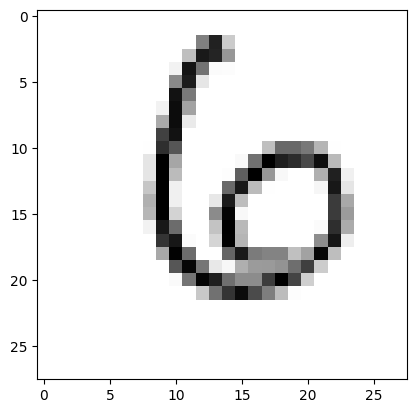

In [70]:
digit = X[100]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [79]:
X_pred = X[555].reshape(1,28*28)
X_pred = X_pred.astype('float32')/255
y_pred = model.predict(X_pred)
print(y_pred)

1/1 [==============================] - 0s 25ms/step
[[2.23610783e-07 3.09836014e-06 4.94378583e-06 5.18451031e-07
  9.99811590e-01 1.20505483e-09 1.28648082e-06 1.18482945e-04
  1.46565128e-06 5.85335620e-05]]


In [80]:
# 9.9981e-01 lon nhat - dem thay o vi tri so 4

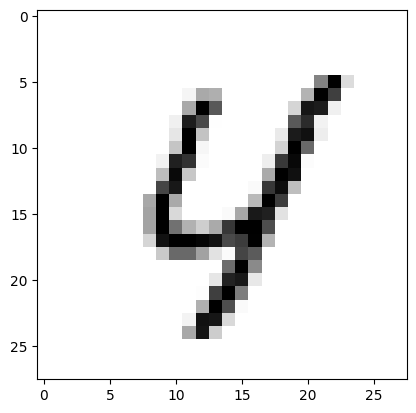

In [81]:
digit = X[555]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [83]:
np.argmax(model.predict(X_pred),axis=1)

1/1 [==============================] - 0s 24ms/step


array([4])

# **Cifar 10**